In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
from enum import Enum


In [2]:
class Image(object):
    
    class ImageFormat(Enum):
        BGR = 0
        RGB = 1
        GRAY =2
    
    def __init__(self,path):
        self.path = path
        
        rgb_image = plt.imread(self.path)
        bgr_image = np.flip(rgb_image,axis=-1)
        gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) 
        
        self.image_list = [bgr_image,rgb_image,gray_image]
        self.image_titles = ['bgr','rgb','gray']
        
        
    def bgr(self):
        return self.image_list[0].copy()
    
    def rgb(self):
        return self.image_list[1].copy()
    
    def gray(self):
        return self.image_list[2].copy()
    
    def show(self,imFormat,show_image=True):
        
        switcher = {
            Image.ImageFormat.BGR  : Image.ImageFormat.BGR.value,
            Image.ImageFormat.RGB  : Image.ImageFormat.RGB.value,
            Image.ImageFormat.GRAY : Image.ImageFormat.GRAY.value
            
        }
        
        index = switcher.get(imFormat, "Invalid image format")
        
        if index == Image.ImageFormat.GRAY.value:
            plt.imshow(self.image_list[index],cmap='gray')
        else:
            plt.imshow(self.image_list[index])
            
        plt.title(self.image_titles[index])
        
        if show_image:
            plt.show()
        
    def show_all(self):
        plt.figure(figsize=[20,10])
        N = 3
        for index in range(N):
            plt.subplot(1,N,index+1)
            self.show(Image.ImageFormat(index),False)
        plt.show()
        

## 3. plot messi.jpg image in RGB,BGR,Gray

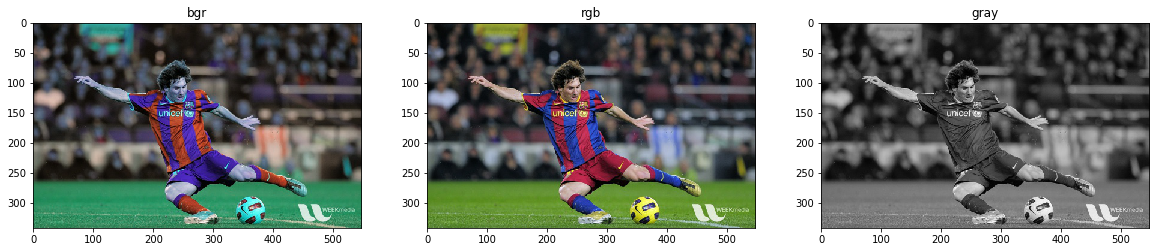

In [3]:
messi_image = Image('./images/messi.jpg')
# lenna_image = Image('./images/Lenna.png')
# track_image = Image('./images/track.jpg')
messi_image.show_all()

## 4. Create zero Matrix And Draw shapes

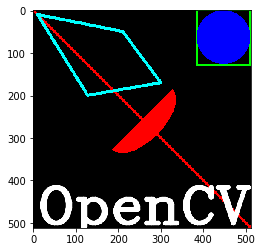

In [4]:
#init matrix
shape_image = np.zeros([512,512,3],dtype='uint8')

red = (255,0,0)
blue = (0,0,255)
green = (0,255,0)

cv2.line(shape_image,
           pt1=(0,0),
           pt2=(511,511),
           color=red,
           thickness=5)

#poly shape
pts = np.array([[10,10],[128,200],[300,170],[210,50]], np.int32)
pts = pts.reshape((-1,1,2))

cv2.polylines(shape_image,
                pts=[pts],
                isClosed=True,
                color=(0,255,255),
                thickness=5)

cv2.putText(shape_image,
              text='OpenCV',
              org=(10,500),
              fontFace=cv2.FONT_HERSHEY_COMPLEX,
              fontScale=4,
              color=(255,255,255), # white
              thickness=10,
              lineType=cv2.LINE_AA)

cv2.rectangle(shape_image,
                 pt1=(384,0),
                 pt2=(510,128),
                 color=green,
                 thickness=3)

cv2.circle(shape_image,
                 center = (447,63),
                 radius = 63,
                 color = blue,
                 thickness=-1)

cv2.ellipse(shape_image,
               center = (256,256),
               axes=(100,50),
               angle=-45,
               startAngle=0,
               endAngle=180,
               color=red,
               thickness=-1)

plt.imshow(shape_image)
plt.show()

## 5. Mark the ball as ROI

In [5]:
image = messi_image.rgb()
ball_roi = cv2.selectROI(messi_image.bgr(),False) # CV2 shows bgr format as rgb
ball_image = image[int(ball_roi[1]):int(ball_roi[1]+ball_roi[3]), int(ball_roi[0]):int(ball_roi[0]+ball_roi[2])]
cv2.waitKey(0)
cv2.destroyAllWindows()

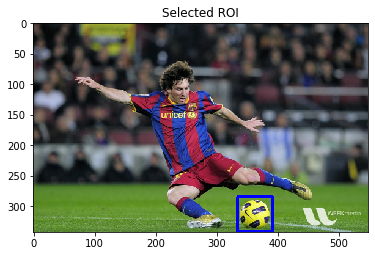

In [6]:
image = cv2.rectangle(messi_image.rgb(),
                 pt1=(ball_roi[0],ball_roi[1]),
                 pt2=(ball_roi[0]+ball_roi[2],ball_roi[1]+ball_roi[3]),
                 color=(0,0,255),
                 thickness=3)
plt.title("Selected ROI")
plt.imshow(image)
plt.show()


# 6. Paste ROI on the image

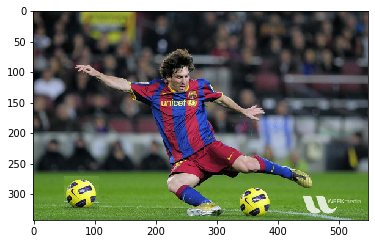

In [7]:
toRow,toCol,_ = ball_image.shape
image = messi_image.rgb()
image[270:270+toRow, 50:50+toCol, :] = ball_image
plt.imshow(image)
plt.show()